# Introduction of Deep Learning with PyTorch

PyTorch : A framework for building and training neural networks. PyTorch in a lot ways behaves like the arrays you love from Numpy.
These Numpy arrays, after all, are just tensors. PyTorch takes these tensors and makes it simple to move them to GPUs for the faster processing needed when training neural networks. It also provides a module that automatically calculates gradient (for backpropagation) and another module specifically for building neural networks. All together, PyTorch ends up being more coherent with python and the NUmpy/Scipy stack compared to Tensorflow and other frameworks.

# Neural Networks

Deep Learning is based on artificial neural networks.The networks are bulit from individual parts approximating neurons, tyupicalluy called units or simply "neurons". each unit has some number of weighted imputs. These weighted inputs are summed together (a linear combination) then passed through an activation function ro get the unit's output.

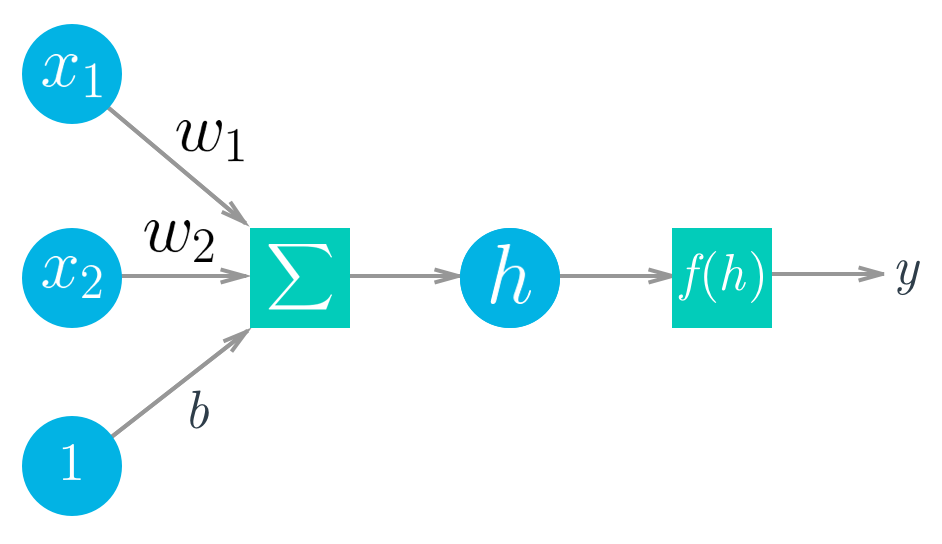

Mathematically this looks like :


\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}

With vectors this is the dot/inner product of two vectors :


h = \begin{bmatrix} 
x_1 \, x_2 \cdots  x_n\end{bmatrix}

\cdot

\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}     

# Tensors

It turns out the neural network computations are just a bunch of linear algebra opeartions on tensors, a generalization of matrices. A vector is 1-Dimensional tesnor, a matrix is 2-Dimensional tensor, an array with three indices is a 3-Dimensional tensor (RGB color images for example). The fundamntal data structure for neural networks are tensors and PyTorch (as well as pretty much every other deep learning framework) is built around tensors.

We have covered basics, now its time to know how we can use PyTorch to build a simple neural network.


# Single layer neural networks 

In [44]:
# Import PyTorch
import torch 

# Sigmoid Activation Formula

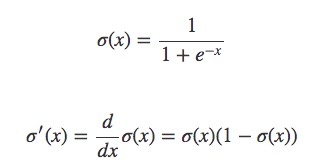



In [45]:
def activation(x):
    """ Sigmoid activation function
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [46]:
# Generate some data
torch.manual_seed(7)  # set the random see so things are predictable

# Features are 3 random normal varaibles
features = torch.randn((1,5))

# True weights for our data, random normal varaibles again
weights = torch.randn_like(features)

# A true Bias term
bias = torch.randn((1,1))


Above generated data we can use to get the output of our simple network. This is all just random for now, as we go ahead we'll start using normal data. Going through each relevant line : 

#### features = torch.randn((1,5)) 
Creates tensor with shape (1,5) , one row and five columns, that contains values randomly distributes according to the normal distribution with a mean of zero and standard deviation of one.4

#### weights = torch.randn_like(features)
Creates another tensor with the same shape as features , again containing values from a normal distribution.

lastly, 
#### bias = torch.randn((1,1))
Creates a single value from a normal distribution.


PyTorch tensors can be added, multiple, saubstracted, etc, just like the Numpy arrays. In genral, we'll use PyTorch tensors preety much the same way we'd use Numpy arrays. PyTorch comes with some amazing benefits such as as GPU accelaration which we'll get ato later. 

# Single layer neural networks solution

In [47]:
# Exercise 1 : Calculate the output of the network with input features , weights and bias. similar to Numpy, PyTorch has a !! torch.sum() function, as well as !! .sum() method on tensors, for taking sums. Use the function activation defined above as the activation function.

# Solution : 
# now make our labels from our data and true weights

y = activation(torch.sum(features * weights) + bias)
print(y)
# y = activation((features * weights).sum() + bias)
print(y)

tensor([[0.1595]])
tensor([[0.1595]])


We can do the multiplaiucation and sum in the same operation using a matrix muiltiplication. In general, we want ot use matrix multiplications since they are more efficient and accelerated using modern libraries and high-performance computing on GPUs.

Here, we want to do matrix multiplication of the features and the weights. For this we can use torch.mm() or torch.matmul() which is somewhat more complivated ans supports broadcasting. If we try to do it with features and weights as they are, we'll get an error


In [48]:
torch.mm(features, weights.t())

tensor([[-1.9796]])

As we're building neural networks in any framewrok, you'll see this often. What's happening here is our tensors aren't the correct shapes to perform a matrix multiplication. Remember that for matrix multiplications, the number of columns in the first tensor must equal to  the number of rows in the second column. Both features and weights have the same shape (1,5). This means we need to change the shape of weights to get the matrix multiplication to work.

Note: To see the shape of a tensor called tensor, use tensor.shape. if you're buliding neural networks, you'll be using this method often.

There are a few options here : weights.rehshape(), weights.resize() and weights.view().

* weights.reshape(a,b) will return a new tensor with the same data as weights with size (a,b)  sometimes, and sometime a clone, as in it copies the data to another party of memory.






* weights.resize_(a,b) returns the same tensor with a different shape. However, if the new shape results in fewer elements than the original tensor, some elements will be removed form the ntensor(but not from memmory). If the new shape results in more elements than the original tensor, new elements will be uninitialized in memory. Here i should note that the underscore at the end of the method denotes that this method is performed in-place.







* weights.view() will return a new tensor with the same data as weights with size (a,b.

Usually use .view(), but any of the three methods will work for this. So, now we are reshape weights to have five rows and one columns with something like weights.view(5,1).



In [49]:
# Calculate the output of this network using matrix multiplication

# Solution :
y = activation(torch.mm(features, weights.view(5,1)) + bias)
print(y)

tensor([[0.1595]])


# Stack them up!


That's how you can calculate the output for a single neuron. The real power of this algorithm happens when you start stacking these individual units into layers and stack of layers, into a network of neurons. With mulitple input units and output units, we now need to express the weights as a matrix.

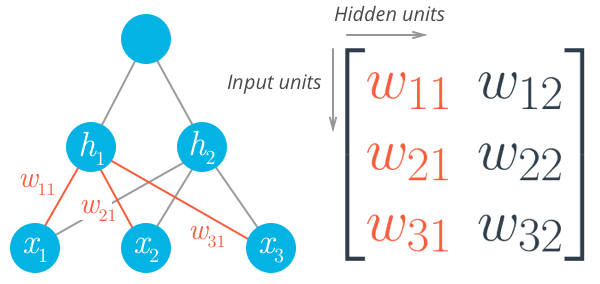

The first layer shown on the bottom here are the inputs, understandably called the input layer. The middle layer is called hidden layer, and the final layer (on the right) is the the output layer.We can express this network mathematically with matrices again and use matrix multiplication to get the linear combinations for each unit in one operation. For example, the hidden layer (h1 and h2 here) can be calculated


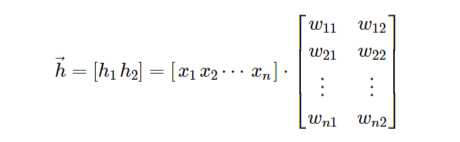

The output for this small network is found by treating the hidden layer as inputs for the output unit. The network output is expressd simply

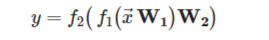

In [6]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

### Generate some data
torch.manual_seed(7)   # set the random seed so things are predictable 

# features are 3 random normal variables 
features = torch.randn((1,3))        # one row and 3 columns

# define the sinze of each layer in our network
n_input = features.shape[1]          # Number of input units, must match number of input features
n_hidden = 2                         # Number of hidden units
n_output = 1                         # Number of output units

# weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)

# weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# bias terms for hidden and output layers
B1 = torch.rand(1, n_hidden)
B2 = torch.randn(1,n_output)

In [7]:
# Solution
h = activation(torch.mm(features, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
print(output)

NameError: name 'activation' is not defined

The number of hidden units a parameter of the network, often callled a Hyperparameter to differentiate it from the weights and biases parameters. when we discussing about training a neural network, the more hidden units a network has, and the more layers, the better able it is to learn from data and make accurate predictions.

# Multilayer Neaural Networks

# Numpy to Torch and back

Pytorch has a great feature for converting between Numpy arrays and Torch tensors. To create a tensor from Numpy array, use torch.from_numpy(). To convert a tensor to a Numpy array, use the .numpy() method.

In [8]:
import numpy as np
a = np.random.rand(4,3)
a

array([[0.86117778, 0.68954111, 0.03090017],
       [0.79715634, 0.19933085, 0.67303138],
       [0.29497377, 0.43977401, 0.09664431],
       [0.96658446, 0.06724921, 0.7573937 ]])

In [9]:
b = torch.from_numpy(a)          # Creating a tensor from numpy array 
b

tensor([[0.8612, 0.6895, 0.0309],
        [0.7972, 0.1993, 0.6730],
        [0.2950, 0.4398, 0.0966],
        [0.9666, 0.0672, 0.7574]], dtype=torch.float64)

In [10]:
b.numpy()      # Converting a tensor to Numpy array

array([[0.86117778, 0.68954111, 0.03090017],
       [0.79715634, 0.19933085, 0.67303138],
       [0.29497377, 0.43977401, 0.09664431],
       [0.96658446, 0.06724921, 0.7573937 ]])

The memory is shared between the Numpy array and Torch tensor, so if you change the values in-place of one object, the other will change as well.

In [11]:
# Multiply Pytorch Tensor by 2 , in place
b.mul_(2)

tensor([[1.7224, 1.3791, 0.0618],
        [1.5943, 0.3987, 1.3461],
        [0.5899, 0.8795, 0.1933],
        [1.9332, 0.1345, 1.5148]], dtype=torch.float64)

In [12]:
# Numpy array matches new values from Tensor 
a

array([[1.72235555, 1.37908222, 0.06180035],
       [1.59431268, 0.3986617 , 1.34606276],
       [0.58994754, 0.87954802, 0.19328863],
       [1.93316892, 0.13449841, 1.5147874 ]])

# Neural Networks in Pytorch
Deep learning networks tend to be massive with dozens or hundreds of layers, that's where the term "deep" comes from. We can build these deep networks using only weight matrices as we did in the previous notebook, but in general it's very complicated and difficult to implement. Pytorch has a nice module nn that provides a nice way to efficiently build large neural networks.

In [13]:
# Import necessary packages

import matplotlib.pyplot as plt

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import os
import sys

import pandas as pd
import numpy as np
import helper
import torch

import importlib


Now we're going to bulid a lager network that can solve a (formerly) difficult problem, identifying text in an image. Here we'll use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels, you can see a sample below

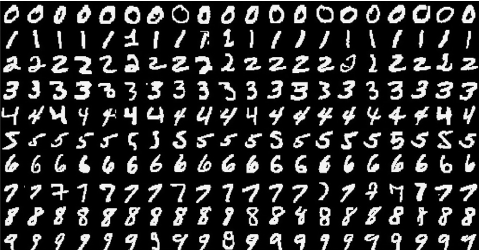

Our goal is to build a neural network that can take one of these images and predict the didgit in the image.

First up, we need to get our datatset. This is provided through the torchvision package.The code below wil download the MNIST dataset, then create training and test datasets for us.

In [14]:
# Run this cell
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


We have the training data loaded into trainloader and we make that an iterator with iter(trainloader). Later, we'll use this loop through the dataset for training,  

      for image, label in tranloader:
           ## do things with images and lables
           
 As we have created the trainloader with a batch size of 64, and shuffle= True. the batch size is the number of images we get in one iteration from the data loader  and pass through our network, often called a batch. and shuffle =True tells it to shuffle the dataset every time we start going through the data loader again. But here i'm just grabbing the 1st batch so we can check out the data. we can see below that images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel and 28x28 images. 

In [15]:

dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

First, let's try to build a simple network for this dataset using weight matrices and matrix multilpications. then we'll see hwo to do it using Pytorch's nn module which provides a much more convenient and powerful method for defining network architectures.

The network you've seen so far are called fully-connected or dense networks. each unit in one layer is connected to each unit in the next layer. in fully-connected networks, the input to each layer must be a one-dimensional vector (which can be stacked into a 2D tensor as a batch of multiple examples). howver, our images are 28x28 2d tensors, so we need to convert them into 1D vectors. Thinkingf about sizes, we need to convert the batch of images with shape(64, 1, 28, 28) to a have a shape of (64, 784 ), 784 is 28 times 28. This is typically called flattening, we flattened the 2d images into 1D vetors.

Previously we have built a network with one output unit. Here we need 10 output units, one for each digit, We want our network to predict the digit shown in an image, so what we'll do is calculate probablities that the image is of any one digit or class.This ends up being a discrete probabilty over classes (digits) that tells us that most likely class for the image. That means we need 10 output units for the 10 classes (digits). We'll see how to convert the network output into a probabiility distribution next.

In [ ]:
# Import PyTorch and torchvision
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Get one batch of images from the data loader
dataiter = iter(trainloader)
images, labels = next(dataiter) # Use next() function instead of next() method


# Plot one of the images using plt.imshow
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')


In [ ]:
print(out.shape)

Now we have 10 outputs for our network. We wnat to pass in an image to our network and get out a probability distribution over the classes that tells us the likely classes the image belongs to. Something that looks like this : 

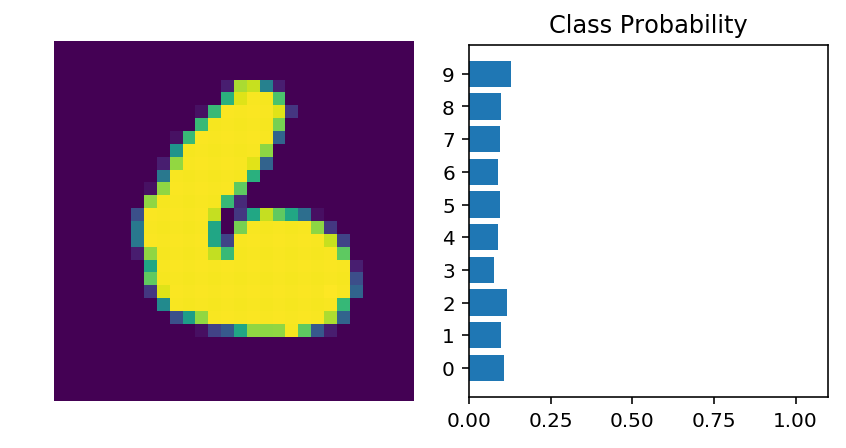

Here we see that the probabilty for each class is roughly the same. This is representing an untrained network, it hasn't seen any data yet so it just returns a uniform distribution with equal probabilities for each class.

To calculate this probability distribution, we often use the softmax function. Mathematically this look like 



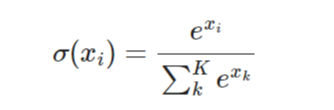

What does is squish each input x1 between 0 and 1 and normalizes the values to give you a proper probability distribution where the probabilities sym up to one.

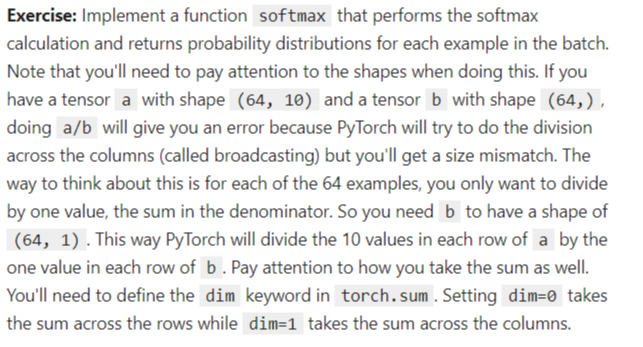

In [1]:
# solution 
# Define a linear layer with 10 output units
import torch
import numpy as np
from torch import nn

# define the softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

linear = nn.Linear(784, 10)

# Define some input tensor with 64 samples and 784 features
input = torch.randn(64, 784)

# Apply the linear layer to the input tensor and get the output tensor
out = linear(input)

# Convert the output tensor from torch to numpy
out_numpy = out.detach().cpu().numpy()

# Apply the softmax function to the output tensor and get the probabilities tensor
probabilities = softmax(out_numpy)

# Print the shape of the probabilities tensor, should be (64, 10)
print(probabilities.shape)


(64, 10)


# Building Networks with PyTorch

PyTorch provides a mudule nn that makes building networks much simpler. Here we'll see how to bulid the same one as above 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [2]:
import torch.nn as nn
from torch import nn

In [3]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        
        # Output layer, 10 units -- one for each digit
        self.output = nn.Linear(256, 10)
        
        # define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

Lets go through bit by bit

class Network(nn.module):

Here we're here inheriting from nn.Module. Combined with super().__init__() this creates a class that tracks the architecture and provides a lot of useful methods and attributes. It is mandatory to inherit from nn.Module when you're creating a class for your network. the name of the class itslef can be anyting.

self.hidden = nn.Linear(784,256)

This line creates a module for a linear transformation, xW + b, with 784 inputs and 256 outputs and assign it to self.hidden. The module automatically creates the weight and bias tensors which we'll use in the forward method. You can access teh weight and bias tensors once the network once it's create at net.hidden.weight and net.hidden.bias.

self.output = nn.Linear(256,10)

Similarly, this creates another linear transformation with 256 inputs and 10 outputs.

self.sigmoid = nn.Sigmoid()
self.softmaxx = nn.Softmax(dim=1)

Here I defined operations for the sigmoid activation and softmax output. Setting dim=1 in nn.Softmax(dim=1) calculates softmax across the columns.

def forward(self, x):
PyTorch networks create with nn.Module must have a forward method defined. It takes in a tensor x and passes it through the operations you defined in the__init__method.

x = self.hidden(x)
x = self.sigmoid(x)
x = self.output(x)
x = self.softmax(x)

Here the inpout tensor x is passed through each operation a reassigned to x. We can see that the input tensor goes through the hidden layer , then a sigmoid function, then the output layer, and finally the softmax function. It doesn't matter what you name the variables here, as long as the inputs and outputs of the operations match the network architecture you want to buld. The order in which you define things in the __init__ method doesn't matter, but you'll need to sequence the operations correcltly in the forward method.

Now, we can create a Network object.

In [4]:
# create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

We can also define the network somewhat more concisely and clearly using the torch.nn.functional module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as F, import torch.nn.functional as F.

In [13]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256,10)
        
    def forward(self, x):
        
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x 

# Activation Functions

So far we've only been looking at the softmax function,  but in general any function can be used as an activation function.The only requirement is that for a network to approximate a non-linear  function, the activation functions must be non-linear. Here are a few more exapmples of common activation functions: Tnah(hyperbolic tangent) and Relu(rectifier linear unit).

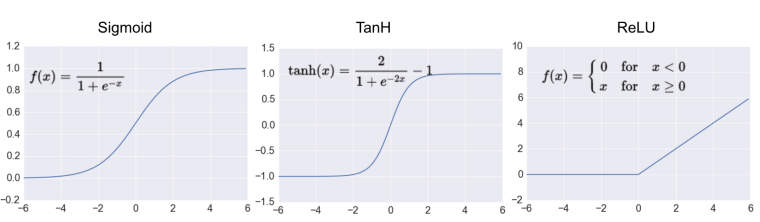

In practice, the Relu function is used almost exclusively as the activation function for hidden layers.


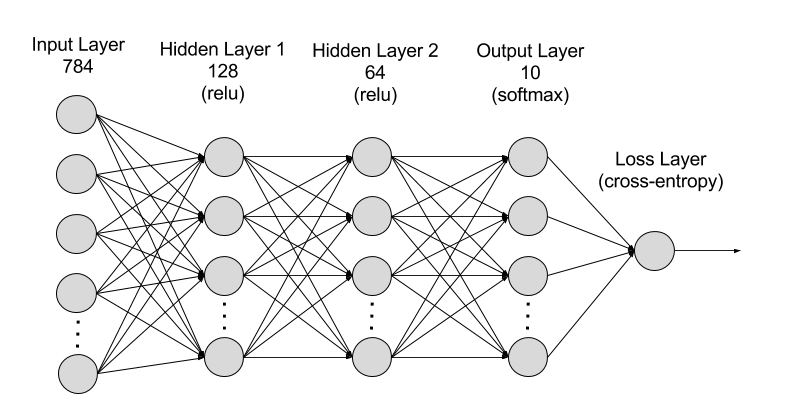

Excercise: Create a network with 784 units, a hidden layer with 128 units and a ReLU activation, the a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. We can see a ReLU activation with the nn.ReLU module or F.ReLU function.


For a good practice name layers by their type of network, for instance 'fc' to represent a fully-connected layer. while doing code in soluion use fc1, fc2 and fc3 as your layer names

In [14]:
# Solution :

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # defining the layers 128, 64, 10 units each 
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear (128,64)
                              
        # Output layer , 10 units - one for each unit
                              
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

# Initializing weights and biases

The weights and biases are automaically initialized for you, but it's possibile to customize how they are initialized. The weights and biases attached to the layer you defined, we can get them with model.fc1.weight for instance

In [15]:
print(model.fc1.weight)
print(model.fc2.bias)

Parameter containing:
tensor([[-0.0075, -0.0016, -0.0056,  ..., -0.0112,  0.0097,  0.0036],
        [ 0.0249,  0.0320,  0.0256,  ...,  0.0289, -0.0127, -0.0235],
        [ 0.0280,  0.0317, -0.0106,  ..., -0.0013,  0.0284, -0.0011],
        ...,
        [-0.0302,  0.0123,  0.0132,  ..., -0.0213,  0.0209,  0.0176],
        [ 0.0048, -0.0046,  0.0323,  ..., -0.0195, -0.0047, -0.0337],
        [-0.0136, -0.0314,  0.0354,  ...,  0.0138, -0.0194, -0.0247]],
       requires_grad=True)
Parameter containing:
tensor([-0.0427, -0.0846,  0.0262,  0.0435, -0.0314,  0.0825,  0.0460,  0.0638,
        -0.0337,  0.0476, -0.0495, -0.0081,  0.0226,  0.0617, -0.0398,  0.0238,
         0.0204, -0.0307,  0.0488, -0.0150, -0.0263, -0.0561,  0.0591, -0.0020,
         0.0167, -0.0423,  0.0067, -0.0059, -0.0815, -0.0803, -0.0290, -0.0646,
        -0.0241,  0.0535, -0.0883, -0.0686, -0.0029,  0.0853, -0.0828, -0.0534,
        -0.0169,  0.0215, -0.0469, -0.0499,  0.0268,  0.0427,  0.0143,  0.0102,
         0.0497

For custom initialization, we want to modify these tensors in place. These are actually autograd variables, so we need to get back the actual tensors with model.fc1.weight.data. Once we have the tensors, we can fill them with zeros(for biases) or random normal values

In [16]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# sample form random normal with satndard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0069,  0.0134, -0.0050,  ...,  0.0064, -0.0037,  0.0119],
        [-0.0113,  0.0080,  0.0008,  ...,  0.0079,  0.0181,  0.0076],
        [ 0.0034,  0.0049,  0.0015,  ..., -0.0071, -0.0055, -0.0117],
        ...,
        [-0.0133, -0.0071,  0.0090,  ...,  0.0030,  0.0014, -0.0077],
        [-0.0066, -0.0141, -0.0195,  ...,  0.0067, -0.0061, -0.0025],
        [-0.0082, -0.0163, -0.0156,  ..., -0.0054, -0.0056,  0.0183]])

# Forward Pass

Now we have a network, let's see what happens when we pass in an image 

In [ ]:

import torch
from torch import nn
import helper
from torchvision import datasets, transforms


# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


# Grab some data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, images pixels)
images.resize_(64, 1, 784)

# Set the index of the image you want to classify
img_idx = 0
# Forward pass through the network
ps = model.forward(images[img_idx, :])

# Display the image and the predicted class
img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)


As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random !

Explanation of above code:

The code downloads the MNIST dataset and loads a batch of 64 images.
It then reshapes the images into a tensor of shape (64, 784) to prepare them for processing.
Random weight matrices W1 and W2, as well as bias vectors b1 and b2, are initialized.
The activation function is applied to the result of the matrix multiplication between the inputs (images after reshaping) and W1, followed by adding b1.
The resulting hidden layer activations are computed and stored in the variable h.
The next step is to calculate the output layer activations by performing matrix multiplication between the hidden layer h and W2, and adding b2.
The final output tensor is stored in the variable out.

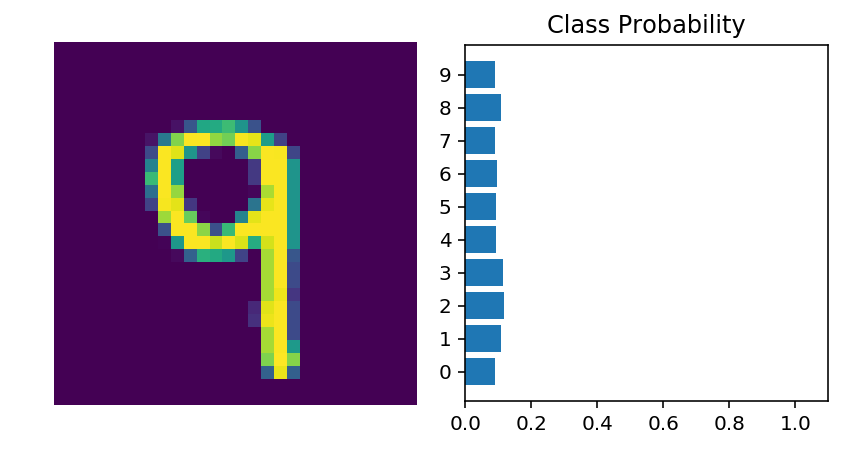

# Using nn.Sequential 

Pytorch provides a convenient way to buld networks like this where a tensor is paased sequantially through operations, nn.sequential https://pytorch.org/docs/master/nn.html#torch.nn.Sequential , usin this to build the equivalent network.

In [3]:
from torch import nn
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


NameError: name 'trainloader' is not defined

The operations are available by passing in the approproiate index. For example, if you want to get first Linear operation and look at the weights , will use model[0]

In [4]:
print(model[0])
print(model[0].weight)

Linear(in_features=784, out_features=128, bias=True)
Parameter containing:
tensor([[ 0.0346, -0.0219,  0.0121,  ...,  0.0087,  0.0275,  0.0212],
        [ 0.0015, -0.0153,  0.0051,  ..., -0.0127, -0.0249, -0.0017],
        [-0.0339, -0.0056, -0.0024,  ..., -0.0265,  0.0294, -0.0088],
        ...,
        [-0.0153, -0.0122, -0.0118,  ..., -0.0159,  0.0233,  0.0233],
        [-0.0177,  0.0307, -0.0286,  ..., -0.0235,  0.0199, -0.0184],
        [ 0.0242, -0.0042, -0.0147,  ...,  0.0269, -0.0201,  0.0270]],
       requires_grad=True)


We can also pass in an OrderDict to name the individual layers and operations instead of using incremental integers. Note that dictionary keys must be unique, so each operation must have a different name.

In [5]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Now you can access layers either by integer or the name 

In [6]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


# Network Architectures in PyTorch :::::###

Training Neural Networks

The network we buit in the previous part isn't so smart, it doesn't know anything about our handwritten digits, Neural networks with non-linear activations work like universal function approximators. There is some function that maps your input to the output. For example, images of handwritten digits to class probabilities. the power of neural networks is that we can train them to approximate this function, and basically any function given enough data and compute time.

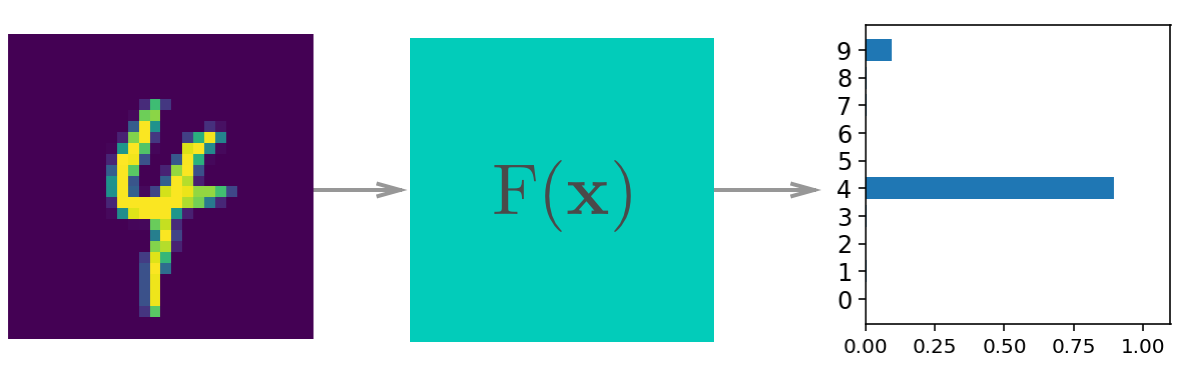

At first the network is naive(lots of experience) , it doesn't know the function mapping the inputs to the outputs. we train the network by showing it examples of real data, then adjusting the network parameters such that it approximates this function. 
To find these parameters, we need to know hjow poorly the network is predicting the real outputs. For this we calculate a loss function (also called the cost), a measure of our prediction error. For example, the mean squared loss is often used in regression and binary classification problems.

Cost/Loss Function: 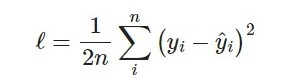

where n is the number of training examples, yi are the true lables, and y hat i are the predicted labels.

By minimizing this loss with respect to the network parameters, we can find configurations where the loss is at a minimum and the network is able to predict the correct labels with high accuracy. We find this minimum ussing a process called gradient descent. The gradiemt is the slope of the loss function and points in the direction of fastest change. To get the minimum in the least amount of time, we then want to follow the gradient (downwards). You can think of this like descending a mountain by following the steepest slope to the base.

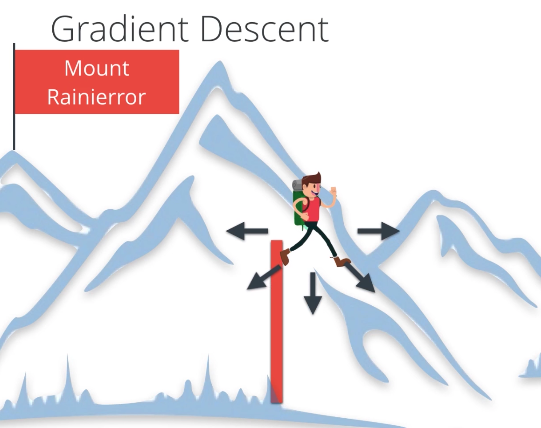

# BackPropagation 

Fo  single layer networks, gradient descent is straightforward to implement. Howerver, its's more complicated for deeper, multilayer neural networks like the one we've built. Complicated enoiugh that it took about 30 years before reserachers figured out how to train multilayer networks.

Training multilayer networks is done through backpropogation which is really just an application of the chain rule from calculus.it's easiet to understand if we convert a two layer network into a graph representation.

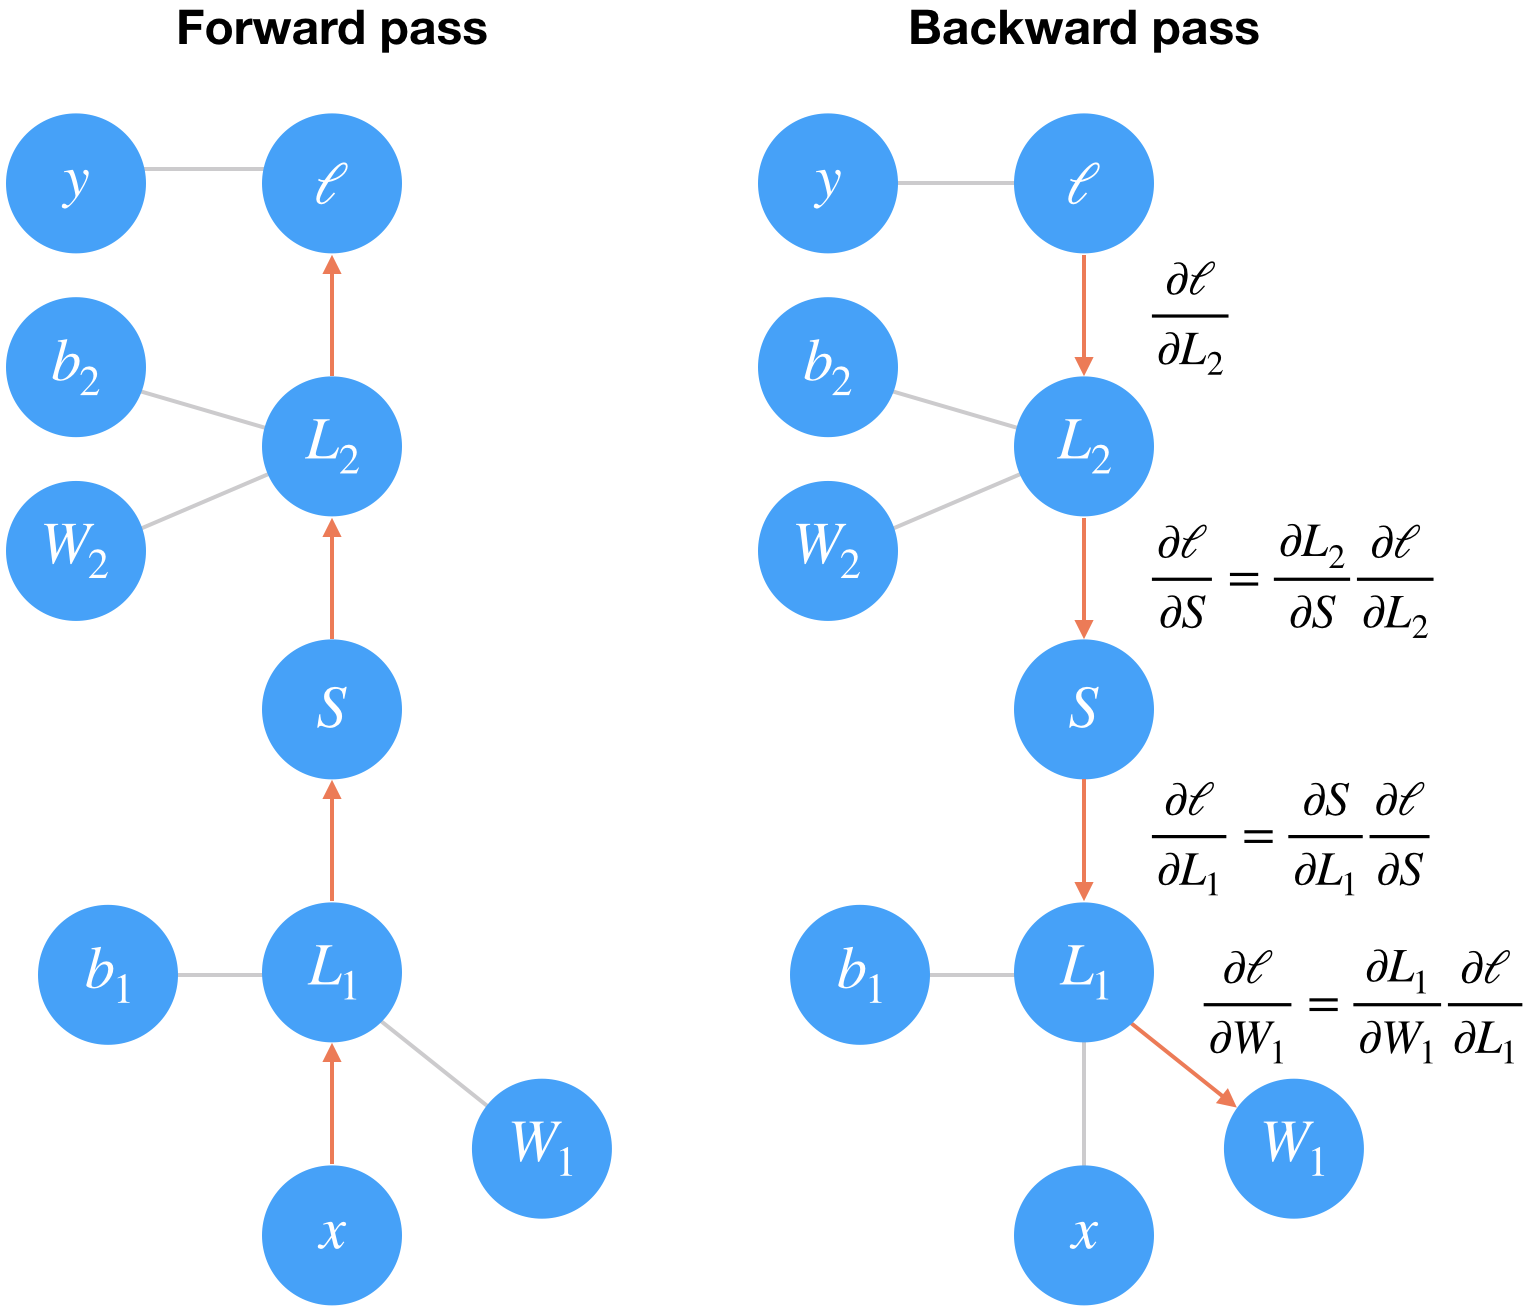

where S = Sigmoid function , L1, L2 = Linear Transformation

In the forward pass through the network, our data and operations go from bottom to top here. We pass the input x through a linear transformation L1 with weights W1 and biases b1. The output then goes through the sigmoid operation S and another linear transformation L2. finally we calculate the loss l. We use the loss as as meausre of how bad the network's predictions are. The goal is to adjust the weights and biases to minimize the loss. 

To train the weights with gradient descent, we propagate the gradient of the loss backwards through the network. Each operation has some gradient between the inputs and outputs. As we send the gradients backwards, we multiply the incoming gradinet with the gradinet for the operation. Mathematically, this is really calculating the gradient of the loss with resoect to the weights using the chain rule.

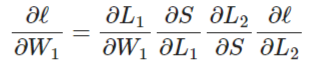

Note : we're glossing over a few details here that require some knowledge of vector calculus, but they aren't necessary to understand what's going on.

we update our weights using this gradient with some learning rate alpha




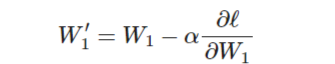

The learning rate alpha is set such that the weight update steps are small enough that the iterative method settles in a minimum.


# Losses in PyTorch

LLet's see how we calculate the loss with PyTorch. Through the nn module, PyTorch provides losses such as the cross-entropy loss (nn.CrossEntropyLoss). You'll usually see the loss assigned to criterion. As noted in the last part, with a classification problem such as MNIST, we're using the softmax function to predict class probabilities. With a softmax output, you wnat to use cross-entropy as the loss. To actually the loss, you first define the criterion then pass in the output of your network and the correct labels.

Something really important to  here. Looking at the documentation for https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss

This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.

The input is expected to contain scores for each class.

This means we need to pass in the raw output of our network into loss, not the output of the softmax function. This raw output is usually called the logits or scores. We use the logits because softmax gives you probalities which will often be very close to zero or one but floating-point numbers can't accurately represent values near zero or one. It's usually best to avoid doing calculations with probalities, typically we use log-probabilties.

In [7]:
# The MNIST datasets are hosted on yann. Lecun.com that has moved under CloudFlare
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener (opener)


In [9]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import transforms
import helper
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

def activation(x):
    return 1 / (1 + torch.exp(-x))

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                               ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [10]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64, 10))
                    
    
# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)

# calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss) 

tensor(2.3101, grad_fn=<NllLossBackward0>)


In sort of experience it's more convenient to build the model with log-softmax output using nn.LoFSoftmax or F.log_softmax. Then we can get the actual probabilities by taking the exponential torch.exp(output). With a log-softmax output, you want to use the negative log likelihood loss, nn.NLLoss.


Exercise : Build a model that returns the log-softmax as the output and calculate thneloss using the negative log likelihood loss.

In [11]:
# Solution
from torch import nn

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
                    
    
# Define the loss
criterion = nn.NLLLoss()   # Negative lilkelihood loss

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logps = model(images)   # logps = log prababilties

# calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss) 

tensor(-0.0139, grad_fn=<NllLossBackward0>)


# Autograd

Now that we know how to calculate a loss, how do use it tperform backpropagation ? 
Torch provides a module, autograd, for automatically calculating the gradients of tensors. we can use it to calculate the gradients of all our parameters with respect to the loss. Autograd works by keeping track of operations performed on tensors, then going backwards through those operations, calculating gradients along the way. To make sure PyTorch keeps track of operations on a tensor and calculates the gradients, you need to set requires_grad = True on a tensor. You can do this at creation with the requires_grad keyword, or at any time with x.requires_grad_(True).

You can turn off gradients for a block of code with the torch.no_grad() content:

x = torch.zeros(1, requires_grad=True)







with torch.no_grad():
 
 
 
 
 
 
 
 
      y = x * 2
      y.requires_grad
False

Also, you can turn on or off gradients altogether with torch.set_grad_enabled(True | False).

The gradients are computed with respect to some variable z with z.backward(). This does backward pass through the operations taht created z.



In [12]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 0.6602, -0.0345],
        [-0.8813,  1.8429]], requires_grad=True)


In [13]:
y = x**2
print(y)

tensor([[4.3585e-01, 1.1881e-03],
        [7.7668e-01, 3.3963e+00]], grad_fn=<PowBackward0>)


In [14]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

The autograd modeule keep tracks of these operationsan knows  hwo to calculate the gradient for each one. In this way, it's able to calculate the gradients for a chain of operations, with respect ton any one tensor. Let's reduce the tensor y to a scalar value, the mean.

In [15]:
z = y.mean()
print(z)

# we can check the gradients for x and y but they are empty generally.

tensor(1.1525, grad_fn=<MeanBackward0>)


In [16]:
print(x.grad)

None


To calculate the gradients, we need to run the .backward method on a variable, z for example. This will calculate the gradient for z with respect to x.

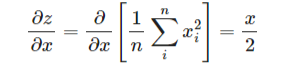

In [17]:
z. backward()
print(x.grad)
print(x/2)

tensor([[ 0.3301, -0.0172],
        [-0.4406,  0.9215]])
tensor([[ 0.3301, -0.0172],
        [-0.4406,  0.9215]], grad_fn=<DivBackward0>)


# Loss and Autograd Together

When we createa network with PyTorch, all of the parameters are initialized with requires_grad=True. This means when we calculate the loss and call loss.backward(). The gradients for the parameters are calculated. These gradients are used to update the weights with gradient descent. we can see the example shown below of calculating the gradients using a backward pass.


In [18]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
                    
    
# Define the loss
criterion = nn.NLLLoss()   # Negative lilkelihood loss

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logps = model(images)   # logps = log prababilties

# calculate the loss with the logits and the labels
loss = criterion(logps, labels)

In [19]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 1.8189e-03,  1.8189e-03,  1.8189e-03,  ...,  1.8189e-03,
          1.8189e-03,  1.8189e-03],
        [ 6.4768e-05,  6.4768e-05,  6.4768e-05,  ...,  6.4768e-05,
          6.4768e-05,  6.4768e-05],
        [ 3.1020e-03,  3.1020e-03,  3.1020e-03,  ...,  3.1020e-03,
          3.1020e-03,  3.1020e-03],
        ...,
        [ 4.6513e-04,  4.6513e-04,  4.6513e-04,  ...,  4.6513e-04,
          4.6513e-04,  4.6513e-04],
        [ 9.9684e-04,  9.9684e-04,  9.9684e-04,  ...,  9.9684e-04,
          9.9684e-04,  9.9684e-04],
        [-1.4548e-03, -1.4548e-03, -1.4548e-03,  ..., -1.4548e-03,
         -1.4548e-03, -1.4548e-03]])


So we can use this gradients in gradient descent to train our network.

 # Training the network 

There's one last piece we need to start training , an optimizer that we'll use to uodate the weights with the gradients. We get these from PyTorch's optim package https://pytorch.org/docs/stable/optim.html
For example we can use us estochastic gradient descent with optim.SGD. You can see how to define an optimizer shown below.

In [20]:
from torch import optim

# optimizers require the parameters to optimize ans a learning rate 
optimizer = optim.SGD(model.parameters(), lr=0.01)

This is important to note that we know hiw to use all the individual parts so it's time to see how they work work together. Let's consider just one learning steps before looping through all the data. the general process with PyTorch:
> Make a forward pass through the network




> Use the network output to calculate the loss






> Perform a backward pass through the network with loss.backward() to calculate the gradients.




> Take a step with the optimizer to update the weights





Below we'll go through one training step and print out the weights and gradients so we can see how it changes. Note that We have a line of code optimizer.zero_grad(). when we do multiple backwards passes with same parameters, the gardients are accumulated. This means the we need to zero the gradientson each training pass or we'll retain gradients form previous training batches.

In [21]:
# accumulated means it sums all the gradients

print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight)


Initial weights -  Parameter containing:
tensor([[-0.0086, -0.0258, -0.0078,  ..., -0.0167,  0.0048,  0.0245],
        [ 0.0354, -0.0121,  0.0337,  ...,  0.0229,  0.0035,  0.0001],
        [ 0.0243, -0.0291, -0.0097,  ..., -0.0137, -0.0290, -0.0129],
        ...,
        [-0.0302,  0.0087, -0.0295,  ...,  0.0039, -0.0058, -0.0019],
        [-0.0327,  0.0281,  0.0052,  ..., -0.0149, -0.0324,  0.0259],
        [-0.0179, -0.0225,  0.0211,  ..., -0.0333,  0.0103,  0.0322]],
       requires_grad=True)
Gradient - Parameter containing:
tensor([[-0.0086, -0.0258, -0.0078,  ..., -0.0167,  0.0048,  0.0245],
        [ 0.0354, -0.0121,  0.0337,  ...,  0.0229,  0.0035,  0.0001],
        [ 0.0243, -0.0291, -0.0097,  ..., -0.0137, -0.0290, -0.0129],
        ...,
        [-0.0302,  0.0087, -0.0295,  ...,  0.0039, -0.0058, -0.0019],
        [-0.0327,  0.0281,  0.0052,  ..., -0.0149, -0.0324,  0.0259],
        [-0.0179, -0.0225,  0.0211,  ..., -0.0333,  0.0103,  0.0322]],
       requires_grad=True)


In [22]:
# Take an update step and few the new weights
optimizer.step()
print('Upadted weights - ', model[0].weight)

Upadted weights -  Parameter containing:
tensor([[-0.0087, -0.0258, -0.0078,  ..., -0.0167,  0.0048,  0.0245],
        [ 0.0354, -0.0121,  0.0337,  ...,  0.0229,  0.0035,  0.0001],
        [ 0.0244, -0.0290, -0.0097,  ..., -0.0137, -0.0289, -0.0128],
        ...,
        [-0.0302,  0.0087, -0.0295,  ...,  0.0040, -0.0058, -0.0019],
        [-0.0327,  0.0281,  0.0052,  ..., -0.0148, -0.0324,  0.0260],
        [-0.0179, -0.0224,  0.0211,  ..., -0.0333,  0.0104,  0.0322]],
       requires_grad=True)


# Training for real 

Now we'll pu this algorithm into a loop so we can go through all the images. Some nomenclature, one pass through the entire dataset is called an epoch. So here we're going to loop through trainloader to get our training batches. For each batch, we'll doing a training pass where we calculate the loss, do a backwards pass, and update the weights.


Exercise : Implement the training pass for our network. If you implemented it correclty, you should see the training loss drop with each epoch.

# ## Training a Network Solution

In [23]:
# Solution

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
                    
    
# Define the loss
criterion = nn.NLLLoss()   # Negative lilkelihood loss
optimizer = optim.SGD(model.parameters(), lr=0.003)       # Stochastic Gradient Descent

epochs = 5
for e in range(epochs):
    running_loss = 0 
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"training loss:  {running_loss/len(trainloader)}")

training loss:  1.8969077358622033
training loss:  0.8881934203827051
training loss:  0.5337665224634508
training loss:  0.4302398401505149
training loss:  0.3844475038429059


With the network trained, we can check out it's predictions

In [24]:
%matplotlib inline 
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

# Turn off gradients to speep up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities 
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)

NameError: name 'F' is not defined

Now Our network is brilliant.It can accuratley predict the digits in our images. Next up we'll write the code for training a neaural network on a more complex dataset.

# Classifying Fashion-MNIST

 Classifying Clothing Images

Now it's our turn to build and train a neural network. we'll be using the Fashin-MNIST dataset https://github.com/zalandoresearch/fashion-mnist 
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neuralnetworks where you can easily achieve better than 97% accuracy. FAshion-MNIST is a set of 28x28 greayscales images of clothes. It's more complex than MNIST, so it's better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.


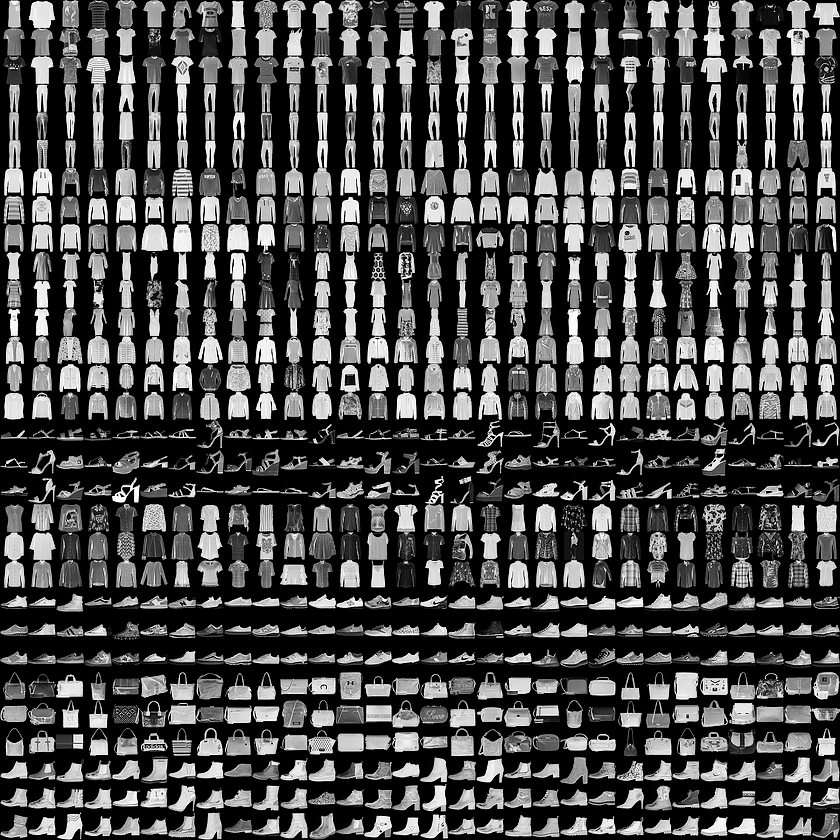

We're going to build neural network.
First will load the dataset through torchvison.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import helper 


import torch.nn.functional as F
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])


# Download and Load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Here we can see one of images

In [ ]:
image, lable = next(iter(trainloader))
helper.imshow(image[0,:]);

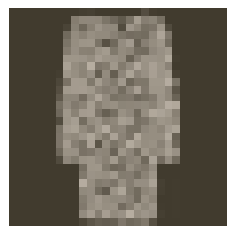

 # Building the network

Here we should define our network. As with MNISt, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. we should include at least one hidden layer. We suggest to you use Relu activations for the layers and to return the logits or lod-softmax from the forward pass. It's on you to how many layers and you want to add and the size of those layers.

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

In [ ]:
# T0D0: Define network architecture here

class classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)          # 256, 128, 64, 10 = Hidden Layer Units
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input is flattened
        x = x.view(x.shape[0], -1)       # x.shape will give batch size and -1 needs to keep the same number of elements ,It is going change our shape
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)  # O  utput
         
        return x
        
        

# Train the network
Now we should create a network and train it. First we have to define the criterion:https://pytorch.org/docs/master/nn.html#loss-functions
(such as example nn.CrossEntropyLoss or nn.NLLLoss) and the optimizer: https://pytorch.org/docs/master/optim.html (typically optim.SGD or optim.Adam).

Then write the training code. Remember the training pass is fairly straighforward process:
1. Make a forward pass the network to get the logits
2. Use the logits to calculate the loss
3. Perform a backward pass through the network with loss.backward() to calculate the gradients.
4. Take a step with the optimizer to update the weights.

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [ ]:
# TODO: Create the network, define the criterion and optimizer

model = classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003) 
# Adam optimizer it is same as stochastic gradient descent but it has nice properties where it uses momentum which speed up the actual fitting process and also adjust the learning rate. 

In [ ]:
# TODO: Train the network here

epochs = 10

for e in range (epochs):
    running_loss = 0    # Tracking loss
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion (log_ps, labels)

        optimizer.zero_grad ()
        loss.backward()     
        optimizer.step()
        
        running_loss += loss.item()
    else:
            print(f"Training loss : {running_loss/len(trainloader)}")
            

As you can see we're getting better results for each epoch completion this because of i increased the size of epochs, so the funda is that if you want better results increase the size of epochs

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network

dataiter = iter(testloader)
images, labels  = next(dataiter)
img = images[1]

# TODO: Calculate the class probabilties (softmax)  for img
ps = torch.exp(model(img))

# Plot the image and probabilties
helper.view_classify(img, ps, version='Fashion')


 The 'grp' error  is coming because of i imported 'helper' which isn't working in windows and for better result i recommend you to use unix system

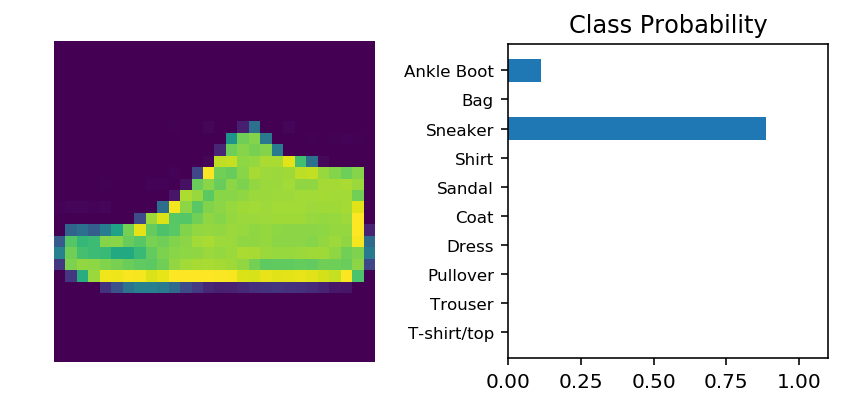

# Inference and Validation

Now we have a trained network, so we can it for making predictions. This is typically called inference, a term bprrowed from statistics. However, neural networks have a tendency to perform too well on the training data and aren't able to generalize to data that hasn't been seen before. This is called Overfitting and it impairs inference performance. tyo test for overfitting while traing, we measure the performance on data not in the training set called the validation set. We avoid overfitting through regulrization such as dropout while monitoring the validation performance during training. we'll see how to do this in PyTorch.

As usual, let's start by loading the dataset through torchvision and loading data in a later part. This time we'll be taking advantage of the test set which you can get by setting train=False here:

> testset = datasets.fashionMNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

The test set contains images jsut like the training set. Typically you'll see 10-20% of the original dataset held out for testing and validation with rest being used for training.

In [6]:
import torch
from torchvision import datasets, transforms

# define a transform to narmalise the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])
#  Download and Load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True ,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


# Download and Load the test data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False ,transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Here we'll create a model like normal , suing the same one from previous solution


In [7]:
from torch import nn, optim
import torch.nn.functional as F

# T0D0: Define network architecture here

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)          # 256, 128, 64, 10 = Hidden Layer Units
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input is flattened
        x = x.view(x.shape[0], -1)       # x.shape will give batch size and -1 needs to keep the same number of elements ,It is going change our shape
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)  # O  output
         
        return x

The goal of validation is to measure the model's performance on data that isn;t part of the traing set. Performance here is up to the developer to define through. Typically this is just accuracy, the percentage of classes the network predicted correctly. other options are 
precison and recall  >>https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context) 
and top-5 error rate. We'll focus on accuracy here.First we'll do a forward pass with one batch from the test set.

In [8]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))

# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


With the probabilities, we can get the most likely class using the ps.topk method. This returns the k highest values.Since we just want the most likely class, we can use ps.top(1). This returns a tuple of top-k values and the top-k indices. If the highest value is the fifth element, well get back 4 as the index.

In [9]:
top_p, top_class = ps.topk(1, dim=1)
# look at the most likely classes for the first 10 examples
print(top_class[:10,])

tensor([[5],
        [5],
        [5],
        [5],
        [5],
        [5],
        [5],
        [5],
        [5],
        [5]])


Class 7 and Class 3 are what being predicted for these. So, remember that this network actually hasn't been trained yet. so it's just making guesses randomly , because it doesn't really know anything about the data yet.

Now we can check the if the predicted classes match the labels. This is simple to do equating top_class and labels. but we have to be v=careful of the shapes. here top_class is a 2D tensor with shape (64,1) while labels is 1D with shape (64). To get the equality to work out the way we want, top_class and labels must ahve the same shape. if we do 

> equals = top_class == labels 






equals will have shape (64, 64), try it. What it's doing doing is comparing the one one element in each row of top_class with each element in labels which returns 64 True/False boolean values for each row.

In [10]:
equals = top_class == labels.view(*top_class.shape)

Now we need to calculate the percentage of correct predictions. equals has binary values, either 0 or 1. This means that if we just sum up all the values and divide by the number of values, we get the percentage of correct predictions. This is the same operation as taking the mean, so we can get the the accuracy with a call to >torch.mean. If only it was that simple. If you try >torch,mean(equals), we'll get an error 

RuntimeError: mean is not implemented for type torch.ByteTensor


This happens because equals has type >>torch.ByteTensor but >>torch.mean isn't implemented for tensors with that type. So we'll need to convert equals to float tensor. Note that when we take >>torch.mean() it returns a scalar tensor, to get the actual value as a float we'll nned to do >>accuarcy.item()

In [11]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 4.6875%


The network is untrained so it's making random guesses and we should see an accuracy
around 10%. Now let's train our network and include our validation pass so we can
measure how well the network is performing on the test set. Since we're not updating our parameters in the validation pass, we can speed up our code by turning off gradients using >> torch.no_gard():



Exercise: Implement the validation loop below and print out the toatal accuarcyu after the loop. You can largely copy and paste from above, but i suggest typing it in because writing it out yourself is essential for bulding the skill. In general, you''ll always learn more by typing it rather than copy-pasting. you should be able to get an accuarcy above 80%.

In [ ]:

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else: 
        test_loss = 0
        accuarcy  = 0    
        
        # Turn off gradients fr validation, saves memory and computations

        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)        # log probabilities
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
                # Get mean loss to enable comparison between train and test sets
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
                

        print("Epoch: {}/{}.. ".format(e+1, epochs),
        "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
        "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
        "Test Accuarcy: {:.3f}..".format(accuracy/len(testloader)))

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

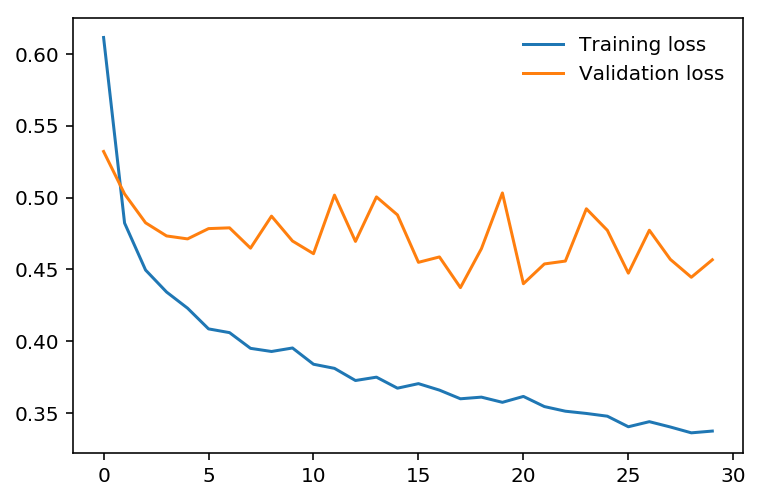

# Overfitting

If we look at the training and validation losses as we train the network, we can see a phenomenin known as overfitting.

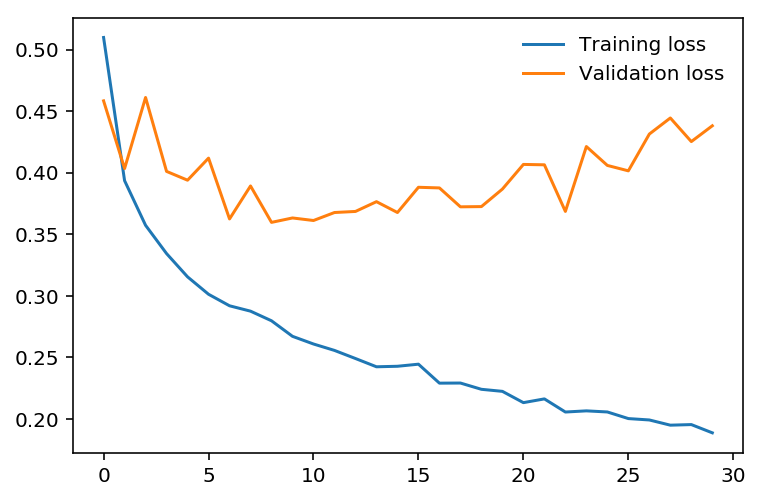

The network learns the training set better and better, resulting in lower training losses. However, it starts having problems generalizing to data outside the training set leading to the validation loss increasing. The ultimate goal of any deep learning model is to make predictions on new data, so we should strive to get the lowest validation loss possible. One option is to use the version of the model with the lowest validation loss, here the one around 8-10 training epochs. This strategy is called Early-stopping. In practice you'll save the model frequently as you're training then later choose the model with the lowest validation loss.

The most common method to reduce overfitting (outside of early stoping) is dropout, where we randomly drop input units. This forces the network to share information between weights, increasing it's ability to generalize to new dta. Adding frouput in PyTorch is straightforward using the nn.Dropout module.

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)          # 256, 128, 64, 10 = Hidden Layer Units
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input is flattened
        x = x.view(x.shape[0], -1)       # x.shape will give batch size and -1 needs to keep the same number of elements ,It is going change our shape
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
       
        # Output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1) 
        
        return x
         

During training we want to use dropout to prevent overfitting, but during inference we want to use the entire network> So, we need to turn off dropout during validation, testing, and whenever we're using the network to make predictions. To do this, you use model.eval(). This sets the model to evaluation mode where the dropout probabilty is 0.You can turn dropout back on by setting the model to train mode with model.train(). In general, the pattern for the validation loop will look like this, where you can turn off gradients, set the model to evaluation mode, calculate the validation loss and metric, then set the model back to train mode.


  turn off gradients
 
 with torch.no_grad
 
    # set model to evaluation mode
    model.eval()
    
    # validation pass here
    for images, labels in testloader:
        ...
        
set model back to train mode
  
  model.train()
  
  
    

In [ ]:
# Exercise : Add dropout to your model and train it on Fashio-MNISt again. See if you can get a lower validation loss.

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)          # 256, 128, 64, 10 = Hidden Layer Units
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input is flattened
        x = x.view(x.shape[0], -1)       # x.shape will give batch size and -1 needs to keep the same number of elements ,It is going change our shape
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
       
        # Output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1) 
        
        return x
         

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else: 
        test_loss = 0
        accuarcy  = 0    
        
        # Turn off gradients fr validation, saves memory and computations

        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)        # log probabilities
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
                # Get mean loss to enable comparison between train and test sets
                
        model.train()  
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
                

        print("Epoch: {}/{}.. ".format(e+1, epochs),
        "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
        "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
        "Test Accuarcy: {:.3f}..".format(accuracy/len(testloader)))

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

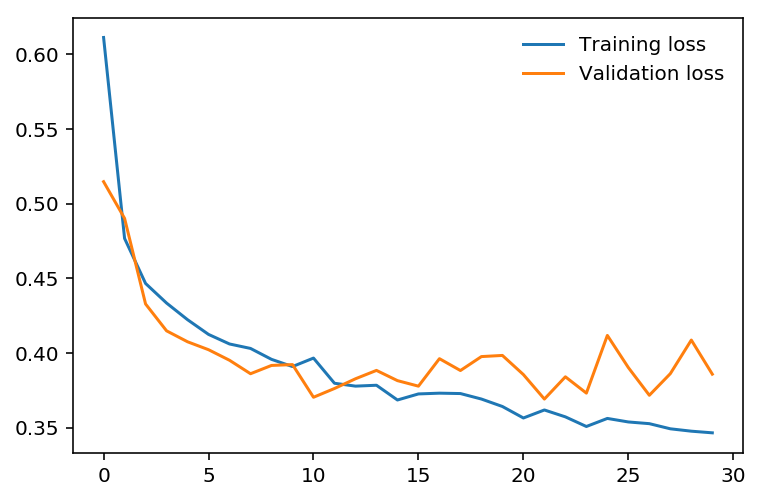

Explanation of the above output 
With Dropout, we've managed to at least reduvce overfitting. so the validation losses isn't as low as we got without dropout being is still, you can see still dropping, so if we kept traing for longer,  we would most likely manage to get our validation loss lower than without dropout.

# Inference

Now the the model is trained, we can use it for inference. we've done this before, but now we need to remember to set the model in inference mode with model.eval(). You'll also want to turn off autograd with the torch.no_grad() context.

In [ ]:
# Import helper module (should be in the repo)
import helper

# Test your network

model.eval()

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]

# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)
    
ps = torch.exp(output)

# Plot the image and probabities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

We'll see ahead that how to save your trained models. In general, you won't want to train a model everytime you need it.Instead, you'll train once, save it, then load the model when you want to train more or use it for inference. 

# Saving and Loading Models

How to save your trained models with PyTorch. This is important because you'll often want to load previously trained models to use in making predictions ot to continue training on new data.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch 
from torch import nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import helper
import fc_model
# fc_model implements a model for building a fully connected classifier.


In [2]:
# define a transform to narmalise the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])
#  Download and Load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


# Download and Load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True ,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


Here we can see one of the images

In [4]:
import helper
image, label = next(iter(trainloader))
helper.imshow(image[0,:])





TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

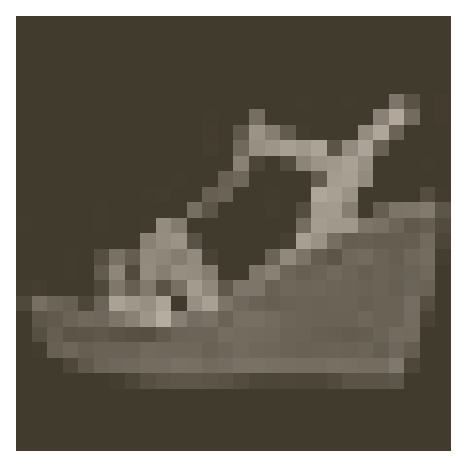

# Train a network

To make things more concise here, i moved the meodel architecture and training code form the last part to a file called fc_model. Importing this, we can easily create a fully-connected network with fc_model.Network, and train the network using fc_model.train. I'll use this model(once it's ytrained) to demonstrate how we can save and load models.

In [5]:
def train(model, trainloader, testloader, criterion, optimizer, epochs=2):
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(trainloader):
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate on test set
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in testloader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Epoch: {} Loss: {:.4f} Accuracy: {:.2f}%'.format(
            epoch, loss.item(), 100 * correct / total))



In [6]:
import torch
from torch import nn
import torch.optim as optim

# Create the network, define the criterion and optimizeriport 
import fc_model as fc_model
model = fc_model.Network(784, 10, [512, 256, 128])  # 784 = Input Units, 10 = Output log softmax, [512, 256, 128] = These are 3 hidden layers , this is the list that contains the size of the hidden layers in between.
criterion =  nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# optim.Adam() is the function that creates an Adam optimizer.
# model.parameters() is a list of all the parameters of the model.
# lr=0.001 is the learning rate.


trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

# Saving and loading networks

As you can iamgine, it's impractical to train a network everytime you need to use it. Instaed, we can save trained networks then load them later to train more or use them for predictions.
The parameters for PyTorch networks are stored in a model's state_dict. we can see the state dict contains the weight and bias matrices for each of our layers.

In [7]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


The simplest thing to do is simply save the state dict with torch.save. For example, we can save it to a file 'checkpoint.pth'.

In [22]:
import torch
torch.save(model.state_dict(), 'checkpoint.pth')

Then we can load the state dict with torch.load.

In [23]:
state_dict = torch.load('checkpoint.pth')
print("The state dict keys: \n\n", model.state_dict().keys())

The state dict keys: 

 odict_keys(['linear.weight', 'linear.bias'])


And to load the state dict into the network, you do model.load_state_dict(state_dict)

In [24]:
model.load_state_dict(state_dict)

<All keys matched successfully>

Seems pretty straightforward, but as usual it's a bit more complicated. Loading the state dict works only if the model architecture is exactly the same as the checkpoint architecture. if I create a model with a different architecture, this fails.

In [33]:
# Try this
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong !
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for Network:
	Missing key(s) in state_dict: "hidden_layers.0.weight", "hidden_layers.0.bias", "hidden_layers.1.weight", "hidden_layers.1.bias", "hidden_layers.2.weight", "hidden_layers.2.bias", "output.weight", "output.bias". 
	Unexpected key(s) in state_dict: "linear.weight", "linear.bias". 

This means we need to rebuild the model exactly as it was when trained. information about the model architecture needs to be saved in the checkpoint, along with the state dict. To do this, you build a dictionary with all the information you need to completely rebuild the model.

In [34]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': {each.out_features for each in model.hidden_layers},
              'state_dict': model.state_dict()}
torch.save(checkpoint, 'checkpoint.pth')

Now the checkpoint has all the necesry information to rebuild the trained model. you can easily make that afunction if you want, similarly we can write a function to load checkpoints.

In [48]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                            checkpoint['output_size'],
                            checkpoint[ 'hidden_layers'])
    model.load_state_dict(state_dict)(checkpoint['state_dict'])
    return model

In [56]:
checkpoint['input_size']

784

In [57]:
checkpoint['output_size']

10

In [58]:
checkpoint['hidden_layers']

{100, 200, 400}

In [63]:
model = load_checkpoint('checkpoint.pth')
print(model)

TypeError: 'set' object is not subscriptable


 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

So the output should be look like as shown above but unfortunately it doesn't showing however, you can try this code and probably it run.